Importing dependencies

In [35]:
import numpy as np
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

Data pre-processing

In [5]:
news_dataset = pd.read_csv('train.csv')
news_dataset.shape
news_dataset.info()
news_dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


Counting missing values

In [6]:
news_dataset.isnull().sum()
news_dataset = news_dataset.fillna('')

Merging author and title

In [7]:
news_dataset['content'] = news_dataset['author'] + '' + news_dataset['title']

In [8]:
news_dataset['content']

0        Darrell LucusHouse Dem Aide: We Didn’t Even Se...
1        Daniel J. FlynnFLYNN: Hillary Clinton, Big Wom...
2        Consortiumnews.comWhy the Truth Might Get You ...
3        Jessica Purkiss15 Civilians Killed In Single U...
4        Howard PortnoyIranian woman jailed for fiction...
                               ...                        
20795    Jerome HudsonRapper T.I.: Trump a ’Poster Chil...
20796    Benjamin HoffmanN.F.L. Playoffs: Schedule, Mat...
20797    Michael J. de la Merced and Rachel AbramsMacy’...
20798    Alex AnsaryNATO, Russia To Hold Parallel Exerc...
20799               David SwansonWhat Keeps the F-35 Alive
Name: content, Length: 20800, dtype: object

Separating te data and label

In [17]:
X = news_dataset.drop(columns = 'label', axis=1)
y = news_dataset.label


In [18]:
print(X)
print(y)

          id                                              title  \
0          0  House Dem Aide: We Didn’t Even See Comey’s Let...   
1          1  FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2          2                  Why the Truth Might Get You Fired   
3          3  15 Civilians Killed In Single US Airstrike Hav...   
4          4  Iranian woman jailed for fictional unpublished...   
...      ...                                                ...   
20795  20795  Rapper T.I.: Trump a ’Poster Child For White S...   
20796  20796  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
20797  20797  Macy’s Is Said to Receive Takeover Approach by...   
20798  20798  NATO, Russia To Hold Parallel Exercises In Bal...   
20799  20799                          What Keeps the F-35 Alive   

                                          author  \
0                                  Darrell Lucus   
1                                Daniel J. Flynn   
2                             Consortiu

Stemming a process of reducing a word to it's root word
eg
acting, actor, actress -----> act

In [19]:
port_stem = PorterStemmer()

# Define the stemming function
def stemming(content):
    # Replace non-alphabetic characters with spaces
    stemmed_content = re.sub('[^a-zA-Z]', ' ', content)
    # Convert to lowercase
    stemmed_content = stemmed_content.lower()
    # Split into words
    stemmed_content = stemmed_content.split()
    # Stem words and remove stopwords
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if word not in stopwords.words('english')]
    # Join words back into a single string
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [12]:
news_dataset['content'] = news_dataset['content'].apply(stemming)

In [20]:
print(news_dataset['content'].head())

0    darrel lucushous dem aid even see comey letter...
1    daniel j flynnflynn hillari clinton big woman ...
2            consortiumnew comwhi truth might get fire
3    jessica purkiss civilian kill singl us airstri...
4    howard portnoyiranian woman jail fiction unpub...
Name: content, dtype: object


Separating data and label

In [27]:
X = news_dataset['content'].values
y = news_dataset['label'].values
print(X)

['darrel lucushous dem aid even see comey letter jason chaffetz tweet'
 'daniel j flynnflynn hillari clinton big woman campu breitbart'
 'consortiumnew comwhi truth might get fire' ...
 'michael j de la merc rachel abramsmaci said receiv takeov approach hudson bay new york time'
 'alex ansarynato russia hold parallel exercis balkan'
 'david swansonwhat keep f aliv']


Convverting the textual data to numerical data

In [29]:
vectorizer = TfidfVectorizer()
vectorizer.fit(X)

X = vectorizer.transform(X)

print(X)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 198373 stored elements and shape (20800, 28419)>
  Coords	Values
  (0, 578)	0.2694167078545384
  (0, 4211)	0.36253203231506576
  (0, 5006)	0.24725958235728157
  (0, 5969)	0.35488202138141456
  (0, 6273)	0.2839932825877812
  (0, 8022)	0.2313366174248873
  (0, 12782)	0.24619727512767192
  (0, 14555)	0.2917725968420029
  (0, 15019)	0.4300622675963931
  (0, 22724)	0.25523360180691607
  (0, 26340)	0.2808837940159642
  (1, 2622)	0.3562953366945267
  (1, 3281)	0.18652439327549428
  (1, 3859)	0.45980466668763476
  (1, 4767)	0.23338756776626793
  (1, 5916)	0.31810058109638056
  (1, 8772)	0.5258635625386451
  (1, 11313)	0.24166773097712638
  (1, 27923)	0.36911845953845024
  (2, 5121)	0.5511414848555652
  (2, 5240)	0.40440534260277944
  (2, 8567)	0.3411947414020896
  (2, 9454)	0.30743020569262086
  (2, 16361)	0.43295215406038445
  (2, 26235)	0.3665032495181434
  :	:
  (20797, 1249)	0.3072223353708335
  (20797, 2257)	0.3357782642976524


Splitting dataset to train and test data

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify= y , random_state= 2)


Training model

In [31]:
model = LogisticRegression()

model.fit(X_train,y_train)

LogisticRegression()

Model evaluation

In [32]:
# For training data
X_train_prediction = model.predict(X_train)
training_accuracy = accuracy_score(y_train,X_train_prediction)
print("Training accuracy", training_accuracy)

Training accuracy 0.971875


In [33]:
# For testing data
y_pred = model.predict(X_test)
testing_accuracy = accuracy_score(y_test,y_pred)
print("Testing accuracy", testing_accuracy)

Testing accuracy 0.9550480769230769


Confusion matrix

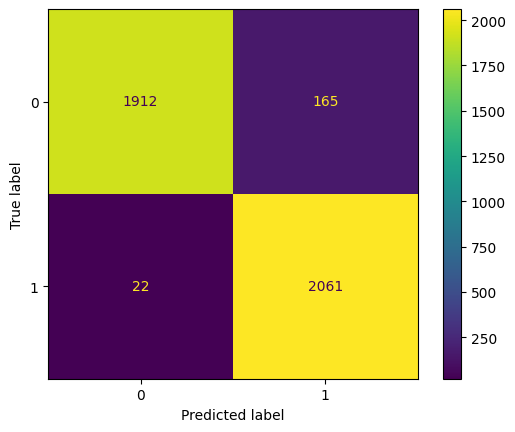

In [36]:
cm = confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(cm).plot()

Making predictive System

In [39]:
X_new = X_test[9]

prediction = model.predict(X_new)
print(prediction)

if prediction[0] == 0:
    print("The news is Real")
else:
    print("The news is fake")

[1]
The news is fake


In [40]:
print(y_test[9])

1
